___
# <font color="gold">**Diagnostic for** <span style="font-variant:small-caps;">tokam2D</span> </font>
___

This notebook, based on <span style="font-variant:small-caps;">tokam2D</span> simulation ouputs, is meant for:
* **Physical quantities computation** (as for now: density, electric potential, vorticity, radial flux, radial velocity, poloidal velocity, reynolds stress and turbulent intensity)
* **Data visualization**
* **Exporting data** (as for now: in .hdf5 format)
* **Make movie of the time evolution of any 2D quantities**

Each of these relies heavily on a class *Simulation* defined in the file *simulation_diag_handler.py* which is a handy tool for fast and easy access to the data.

Below, practical examples are given for each of these tasks.

## **Choose a simulation**

In [ ]:
from simulation_diag_handler import Simulation, set_plot_defaults

sim_path = '/simulation/folder/path'

sim = Simulation(sim_path)

## **Vizualisation**

### **Vizualisation of 2D map in real space**

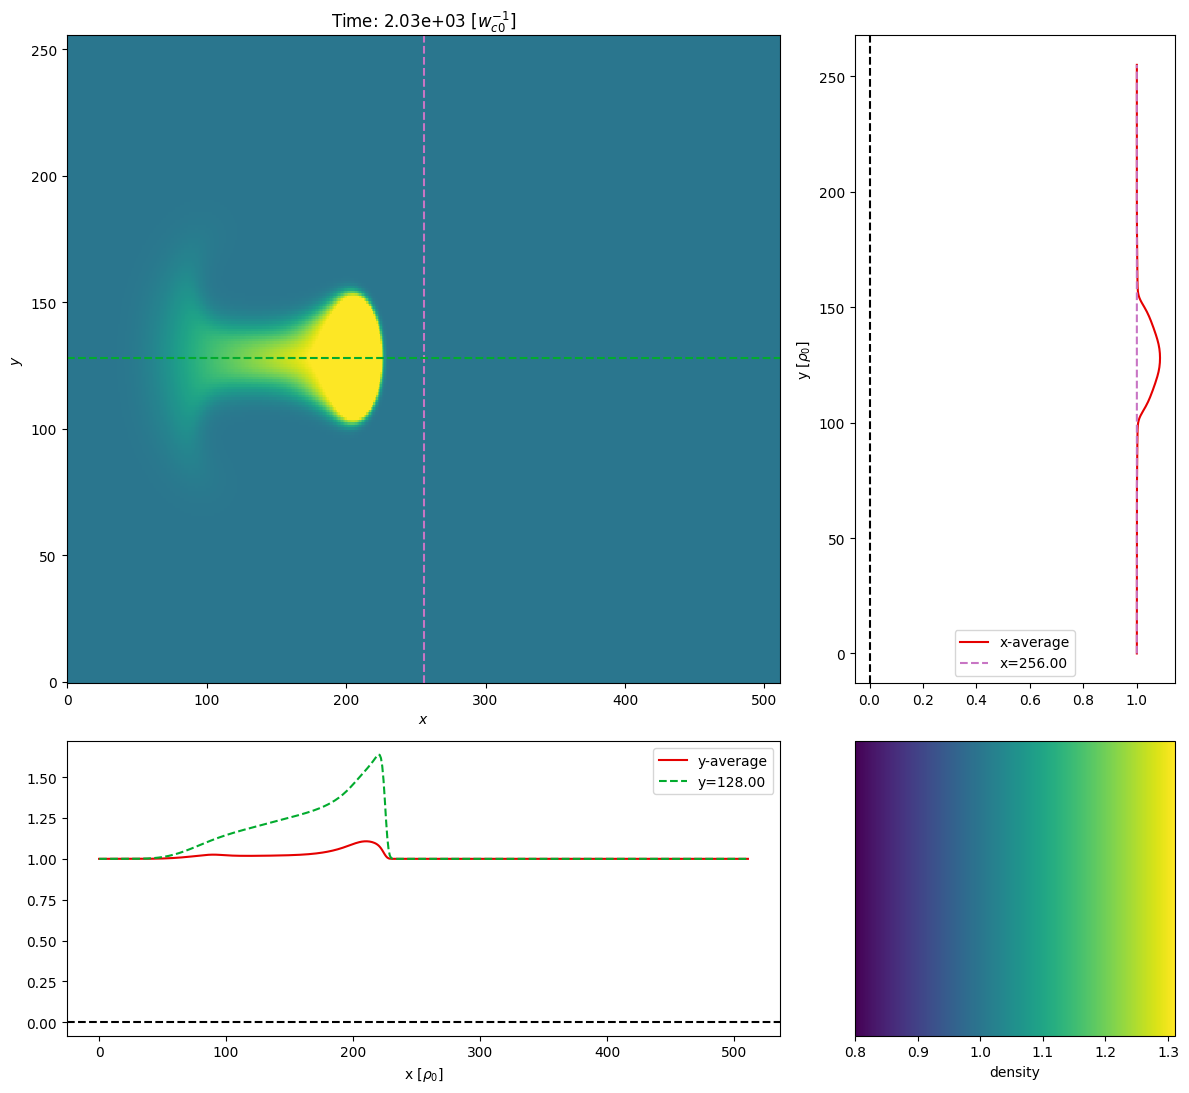

In [2]:
%matplotlib inline

import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import numpy as np

# Choose the field to plot, choices are: 'density', 'potential', 'vorticity', 'flux', 'VEx', 'VEy', 'Isq', 'reynolds_stress'
param = 'density'

it = len(sim['time'])-1
symetrical_cmap = False
colormap_range = 0.8
bool_appearing_lines = True
ix = len(sim['x'])//2
iy = len(sim['y'])//2

plt.close('all')

fig = plt.figure(figsize=(12,12))

Pmap = sim.get_data_slice(param, it)
if symetrical_cmap:
    vmax = colormap_range*max( abs( np.min(Pmap) ), abs( np.max(Pmap) ) )
    vmin = -vmax
else:
    vmin = colormap_range*np.min(Pmap)
    vmax = colormap_range*np.max(Pmap)

gs = gridspec.GridSpec(3, 3)

ax_map = fig.add_subplot(gs[0:2,0:2])
ax_y = fig.add_subplot(gs[0:2,2])
ax_x = fig.add_subplot(gs[2,0:2])
ax_cbar = fig.add_subplot(gs[2,2])

ax_map.set_title(fr"Time: {sim['time'][it]:.2e} $[w_{{c0}}^{{-1}}]$")

p=ax_map.pcolormesh(sim['x'][:],sim['y'][:],Pmap,vmin=vmin,vmax=vmax)

# cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(p,cax=ax_cbar, fraction=0.9, pad=0.4, orientation='horizontal')
ax_cbar.set_xlabel(param)

ax_map.set_xlabel(r'$x$')
ax_map.set_ylabel(r'$y$')

ax_x.plot(sim['x'][:], np.mean(Pmap ,axis=0),color='xkcd:red',label='y-average')
ax_x.set_xlabel(r'x $[\rho_{0}]$')
ax_x.axhline(y=0,c='k',ls='--')

ax_y.plot(np.mean( Pmap ,axis=1), sim['y'][:],color='xkcd:red',label='x-average')
ax_y.axvline(x=0,c='k',ls='--')

ax_y.set_ylabel(r'y $[\rho_{0}]$')

if bool_appearing_lines:
    ax_map.axvline(x=sim['x'][ix], c='xkcd:orchid',ls='--')
    ax_map.axhline(y=sim['y'][iy], c='xkcd:kelly green',ls='--')
    ax_x.plot(sim['x'][:], Pmap[iy,:], c='xkcd:kelly green',ls='--',label=f'y={sim["y"][iy]:.2f}')
    ax_y.plot(Pmap[:,ix], sim['y'][:], c='xkcd:orchid',ls='--',label=f'x={sim["x"][ix]:.2f}')

for axes in [ax_y,ax_x]: 
    axes.legend()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


### **Interactive vizualisation of 2D map in real space** <font color="coral">(need the **ipywidgets** library installed)</font>

In [ ]:
import ipywidgets as widgets
%matplotlib widget
from ipywidgets import Layout, interact
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import numpy as np

from simulation_diag_handler import Simulation, set_plot_defaults

# sim = Simulation('/home/robin.varennes/work/mysimcode/SOL_interchange_driftwave')

set_plot_defaults()

plt.close('all')

fig = plt.figure(figsize=(12,12))

def update_plot(param, it, ix, iy,
               colormap_range,dpi_adjust, symetrical_cmap, bool_appearing_lines):
    
    plt.clf()

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    for axes in fig.axes: axes.clear()

    Pmap = sim.get_data_slice(param, it)
    if symetrical_cmap:
        vmax = colormap_range*max( abs( np.min(Pmap) ), abs( np.max(Pmap) ) )
        vmin = -vmax
    else:
        vmin = colormap_range*np.min(Pmap) 
        vmax = colormap_range*np.max(Pmap) 

    gs = gridspec.GridSpec(3, 3)

    ax_map = fig.add_subplot(gs[0:2,0:2])
    ax_y = fig.add_subplot(gs[0:2,2])
    ax_x = fig.add_subplot(gs[2,0:2])
    ax_cbar = fig.add_subplot(gs[2,2])

    ax_map.set_title(fr"Time: {sim['time'][it]:.2e} $[w_{{c0}}^{{-1}}]$")

    p=ax_map.pcolormesh(sim['x'][:],sim['y'][:],Pmap,vmin=vmin,vmax=vmax, cmap='RdYlBu_r')
    # p=ax_map.pcolormesh(sim['x'][:],sim['y'][:],Pmap,vmin=1,vmax=vmax, cmap='hot')
    # Add contour lines
    # ax_map.contour(sim['x'][:],sim['y'][:],Pmap,levels=10,colors='k',linewidths=0.5)

    # cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(p,cax=ax_cbar, fraction=0.9, pad=0.4, orientation='horizontal')
    ax_cbar.set_xlabel(param)

    ax_map.set_xlabel(r'$x$')
    ax_map.set_ylabel(r'$y$')

    ax_x.plot(sim['x'][:], np.mean(Pmap ,axis=0),color='xkcd:red',label='y-average')
    ax_x.set_xlabel(r'x $[\rho_{0}]$')
    ax_x.axhline(y=0,c='k',ls='--')

    ax_y.plot(np.mean( Pmap ,axis=1), sim['y'][:],color='xkcd:red',label='x-average')
    ax_y.axvline(x=0,c='k',ls='--')

    ax_y.set_ylabel(r'y $[\rho_{0}]$')

    if bool_appearing_lines:
        ax_map.axvline(x=sim['x'][ix], c='xkcd:orchid',ls='--')
        ax_map.axhline(y=sim['y'][iy], c='xkcd:kelly green',ls='--')
        ax_x.plot(sim['x'][:], Pmap[iy,:], c='xkcd:kelly green',ls='--',label=f'y={sim["y"][iy]:.2f}')
        ax_y.plot(Pmap[:,ix], sim['y'][:], c='xkcd:orchid',ls='--',label=f'x={sim["x"][ix]:.2f}')

    for axes in [ax_y,ax_x]: 
        axes.legend()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])


    fig.savefig(f'blob_tokam2d.png')
    
itmax = len(sim['time'])-1
ixmax = len(sim['x'])-1
iymax = len(sim['y'])-1

itime_slider=widgets.IntSlider(value=itmax,min=0,max=itmax,step=1,description="Time index",layout=Layout(width='50%'))
ix_slider=widgets.IntSlider(value=ixmax//2,min=0,max=ixmax,step=1,description="x index",layout=Layout(width='50%'))
iy_slider=widgets.IntSlider(value=iymax//2,min=0,max=iymax,step=1,description="y index",layout=Layout(width='50%'))
float_range_time_slider = widgets.FloatRangeSlider(value=[sim['time'][-2], sim['time'][-1]], min=0, max=sim['time'][-1], step=8, description='Time range', layout=Layout(width='50%'), style = {'description_width': 'initial'}, continuous_update=False)
float_range_x_slider  = widgets.FloatRangeSlider(value=[0.8, 0.9], min=0, max=1.2, step=0.01, description='Normalized radius range', layout=Layout(width='50%'), style = {'description_width': 'initial'}, continuous_update=False)
param_widget = widgets.Text(value='density', placeholder='Type something', description= 'Select parameter:', continuous_update=False)

interact(update_plot, 
         it                   = itime_slider,
         ix                   = ix_slider,
         iy                   = iy_slider,
         colormap_range       = widgets.FloatSlider(min=0.01, max=2, step=0.01,value=0.8, continuous_update=False),
         symetrical_cmap      = widgets.Checkbox(value=False,description='symetrical_cmap'),
         bool_appearing_lines = widgets.Checkbox(value=True,description='Appearing lines'),
         param                = widgets.Text(value='density', placeholder='Type something', description= 'Select parameter:', continuous_update=False),
         dpi_adjust           = widgets.IntSlider(min=30, max=200, step=1 ,value=100, continuous_update=False)
        );

## **Export**

### **Export in HDF5**

In [ ]:
## Choose a field and either an index or a slice in time, y and x. If undefined, the whole dimension is kept.
field = 'Isq'

# it = slice(itmax//2,itmax)
it = slice(0,itmax,32)

# Export the data to a file. 
# If no path is given, the file is saved in the simulation directory.
# If no filename is given, the file is saved as {field}_{simulation_folder_name}.h5

sim.export_to_h5(field, path=None, filename=None, it=it, ix=None, iy=None) # Save the field at the chosen time index/slice, for the whole spatial domain

### **Save frames and/or movie**

In [3]:
## Save movie and, if desired, the frames of the time evolution of a field
## For AI purposes, the boolean 'for_AI' generate frames without axes and colorbar
## The individual frames can also be saved with the boolean 'save_frames'
## If no path is given, the movie is saved in the simulation directory.
## A time range can be specified with the 'it_slice' argument. If not, the whole time range is used.
## If the parallel boolean is set to True, the movie is generated using "num_cores" cores (all available if not specified).

sim.make_movie(field='density', path=None, filename='mysim', it_slice=None, parallel=True, num_cores=None, for_IA=False, scheme=None, cmap='plasma', vmin=None, vmax=None, fps=30, save_frames=False)

2026-01-20 15:16:52,272 - WARNING - 
If this happens, you can try to kill the processes intensively using CPU, e.g. VScode (use can use the 'htop' shell command to see a list of current processes).
2026-01-20 15:16:53,089 - INFO - Running in parallel using 96 cores.
2026-01-20 15:16:53,577 - INFO - Generating frame 0
2026-01-20 15:16:53,579 - INFO - Generating frame 1
2026-01-20 15:16:53,582 - INFO - Generating frame 2
2026-01-20 15:16:53,584 - INFO - Generating frame 3
2026-01-20 15:16:53,587 - INFO - Generating frame 4
2026-01-20 15:16:53,589 - INFO - Generating frame 5
2026-01-20 15:16:53,591 - INFO - Generating frame 6
2026-01-20 15:16:53,594 - INFO - Generating frame 7
2026-01-20 15:16:53,596 - INFO - Generating frame 8
2026-01-20 15:16:53,598 - INFO - Generating frame 9
2026-01-20 15:16:53,601 - INFO - Generating frame 10
2026-01-20 15:16:53,603 - INFO - Generating frame 11
2026-01-20 15:16:53,611 - INFO - Generating frame 15
2026-01-20 15:16:53,610 - INFO - Generating frame 14
2